In [ ]:
!pip install wandb
import wandb
wandb.init()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
import keras
import numpy as np
import os
import keras
import numpy as np
import tensorflow as tf
#from tensorflow.keras.preprocessing.image import image
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
import cv2
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

import numpy as np
import glob
import cv2
import os
import matplotlib.pyplot as plt
import h5py

from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import BatchNormalization, Flatten, Conv2D, SeparableConv2D
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
# from tensorflow.keras.backend.tensorflow_backend import set_session
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datagen = ImageDataGenerator(rescale = 1./255,
        validation_split= 0.2,
        preprocessing_function=preprocess_input
        ) 

train_gen = datagen.flow_from_directory( batch_size = 16, 
                                                      directory= 'drive/MyDrive/DOPTRAIN', 
                                                      shuffle = True, 
                                                      target_size = (256, 256), #pixel size
                                                      class_mode = 'categorical', #categorical classfication
                                                      subset= 'training',
                                                       seed = 0)
validation_gen = datagen.flow_from_directory(batch_size = 16,
                                                     directory= 'drive/MyDrive/DOPTRAIN',
                                                     shuffle = True,
                                                     target_size = (256, 256),
                                                     class_mode = 'categorical', 
                                                     subset= 'validation')


Found 3415 images belonging to 4 classes.
Found 850 images belonging to 4 classes.


In [ ]:
#from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import keras
vgg = applications.VGG16(include_top=False, weights='imagenet', input_shape=(256,256,3))
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg = Model(vgg.input, output)
for layer in vgg.layers:
    layer.trainable = False
vgg.summary()

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
# # we use SGD with a low learning rate
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(vgg)
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_dim=256))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer=Nadam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

In [ ]:

history = model.fit_generator(train_generator,
                    steps_per_epoch = train_generator.n// 16,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // 16,
                    epochs=50)

In [ ]:
'''from keras.applications.xception import Xception
# from keras.applications.inception_resnet_v2 import InceptionResNetV2
base_model = applications.VGG16(weights='imagenet', include_top=False)

#add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, kernel_regularizer = regularizers.l2(0.001), activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# # we use SGD with a low learning rate
from keras.optimizers import Nadam
from keras.optimizers import Adam
model.compile(optimizer=Nadam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
# model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# # we train our model again (this time fine-tuning the top 2 inception blocks
# # alongside the top Dense layers
# model.fit_generator(...)
#model.fit(X_train, y_train, validation_data=(X_val, y_val),shuffle="batch" ,epochs=10, batch_size=10,verbose=1)
history = model.fit(train_gen, 
                              steps_per_epoch= train_gen.n // 16, 
                              epochs = 50, 
                              validation_data= validation_gen, 
                              validation_steps= validation_gen.n // 16
                              )'''

58892288/58889256 [==============================] - 1s 0us/step
Epoch 1/50
213/213 [==============================] - 1576s 7s/step - loss: 1.4924 - accuracy: 0.5194 - val_loss: 0.7971 - val_accuracy: 0.7995
Epoch 2/50
213/213 [==============================] - 93s 436ms/step - loss: 0.7401 - accuracy: 0.8134 - val_loss: 0.5142 - val_accuracy: 0.8821
Epoch 3/50
213/213 [==============================] - 93s 434ms/step - loss: 0.5001 - accuracy: 0.8737 - val_loss: 0.4240 - val_accuracy: 0.8986
Epoch 4/50
213/213 [==============================] - 93s 437ms/step - loss: 0.3916 - accuracy: 0.9021 - val_loss: 0.4916 - val_accuracy: 0.8868
Epoch 5/50
213/213 [==============================] - 93s 437ms/step - loss: 0.3489 - accuracy: 0.9191 - val_loss: 0.4394 - val_accuracy: 0.8726
Epoch 6/50
213/213 [==============================] - 94s 439ms/step - loss: 0.3336 - accuracy: 0.9201 - val_loss: 0.6071 - val_accuracy: 0.8455
Epoch 7/50
213/213 [==============================] - 94s 439ms/st

In [ ]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

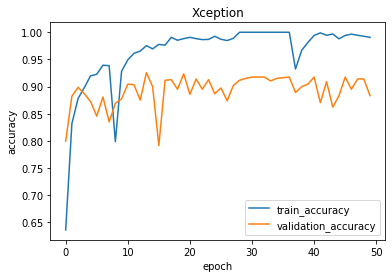

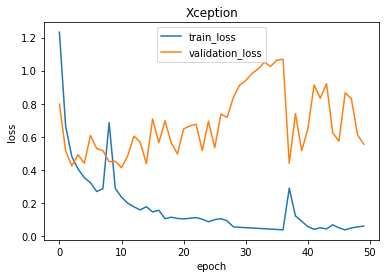

In [ ]:
plot_accuracy(history,'Xception')
plot_loss(history,'Xception')

In [ ]:
evaluate = model.evaluate_generator(test_generator, steps = test_generator.n//1, verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


234/234 [==============================] - 105s 448ms/step - loss: 1.5530 - accuracy: 0.2991
